Let's look at some generated data and extract the uncertainty in our fit parameters using the covariance matrix of the polyfit function.

In [ ]:
import numpy as np
# Generate 10 points from 0 to 5
x=np.linspace(0,5,10)
# Generate 10 points from 0 to 10
y=np.linspace(0,10,10)

Plotting a scatter function between x and y.

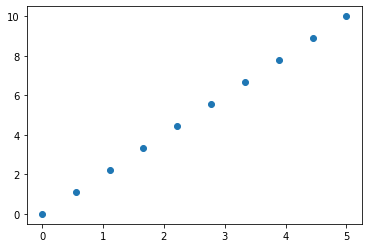

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

The data seems to resemble a perfect straight line. Let's extract the slope and intercept using np.polyfit.

In [ ]:
results=np.polyfit(x,y,1)
print(results)

[ 2.00000000e+00 -2.59529712e-16]


The slope is 2 and the intercept is essentially zero. Let's plot the best fit line on top of the data to see what it looks like.

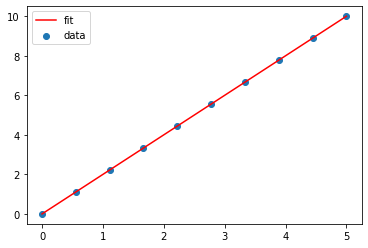

In [ ]:
plt.scatter(x,y,label="data")
plt.plot(x,results[0]*x+results[1],color="red",label="fit")
plt.legend()

The best fit line sits right on top of all the points. This means that we can be extremely sure that we have the right line through these points.

We can find the uncertainty in our slope and intercept using the covariance matrix. Inside the np.polyfit() function, set cov = True and introduce another variable on the left side along with results.

Results will now store the slope and intercept while cov will store the covariance matrix.

In [ ]:
results, cov = np.polyfit(x,y,1,cov=True)

In [ ]:
print(results)

[ 2.00000000e+00 -2.59529712e-16]


In [ ]:
print(cov)

[[ 5.02497782e-32 -1.25624446e-31]
 [-1.25624446e-31  4.42011938e-31]]


Notice that the top right and bottom left values are equal. They represent the covariance between the slope and the intercept. 

The covariance matrix has 4 values in this case. It can be represented as 

$$ \begin{bmatrix}
\sigma^2_{m} & \sigma^2_{m,b} \\
\sigma^2_{b,m} & \sigma^2_{b} 
\end{bmatrix} $$

$\sigma^2_m$ is the variance in the slope $m$ and $\sigma^2_b$ is the variance in the intercept $b$.  


In [ ]:
print("Error in slope is "+str(np.sqrt(cov[0,0])))
print("Error in intercept is "+str(np.sqrt(cov[1,1])))

Error in slope is 2.2416462308885536e-16
Error in intercept is 6.648397839046706e-16


Recall that
1. The square root of variance is standard deviation.
2. The standard deviation is a representation of the error in a quantity.

Since the best fit line was right on top of the data, the error or uncertainty in our slope and intercept is zero. cov[0,0] holds the variance in slope while cov[1,1] holds the variance in the intercept.

Let's now look at a noisier dataset. We add some noise using np.random.normal() which generates 10 values from a Gaussian with mean = 0 and standard deviation = 0.5.

In [ ]:
# Creating noise
noise = np.random.normal(0,0.5,10)

In [ ]:
y_noise=y+noise

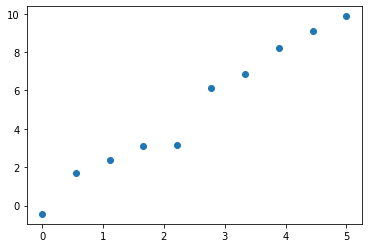

In [ ]:
plt.scatter(x,y_noise)

In [ ]:
results_noise=np.polyfit(x,y_noise,1)
print(results_noise)

[ 2.05140342 -0.12526275]


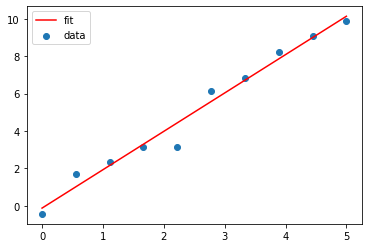

In [ ]:
plt.scatter(x,y_noise,label="data")
plt.plot(x,results_noise[0]*x+results_noise[1],color="red",label="fit")
plt.legend()

If we plot the data and the best fit, we see that the best fit line does not go through all the points. The line is a good representation of what the data looks like (in fact it is the best).

In [ ]:
results_noise, cov_noise = np.polyfit(x,y_noise,1,cov=True)

In [ ]:
cov_noise

array([[ 0.01356367, -0.03390918],
       [-0.03390918,  0.11931009]])

The covariance matrix values are significantly larger than last time. 

In [ ]:
print("Error in slope is "+str(np.sqrt(cov_noise[0,0])))
print("Error in intercept is "+str(np.sqrt(cov_noise[1,1])))

Error in slope is 0.11646318233203526
Error in intercept is 0.3454129197888142


This means that the slope for this line is 2.051 $\pm$ 0.116 while the intercept is -0.125 $\pm$ 0.345. 

We can create even more noise and see what happens to the values.

In [ ]:
#Creating more noise
noisier = np.random.normal(0,1,10)
y_noisier = y+noisier

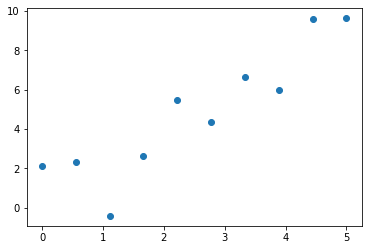

In [ ]:
plt.scatter(x,y_noisier)

In [ ]:
results_noisier=np.polyfit(x,y_noisier,1)
print(results_noisier)

[1.76113464 0.43970295]


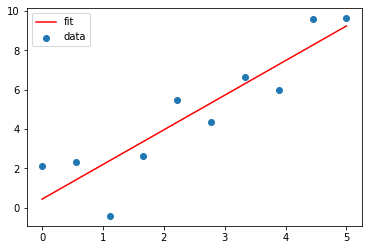

In [ ]:
plt.scatter(x,y_noisier,label="data")
plt.plot(x,results_noisier[0]*x+results_noisier[1],color="red",label="fit")
plt.legend()

In [ ]:
results_noisier, cov_noisier = np.polyfit(x,y_noisier,1,cov=True)

In [ ]:
cov_noisier

array([[ 0.08892406, -0.22231014],
       [-0.22231014,  0.78220234]])

In [ ]:
print("Error in slope is "+str(np.sqrt(cov_noisier[0,0])))
print("Error in intercept is "+str(np.sqrt(cov_noisier[1,1])))

Error in slope is 0.2982013682748009
Error in intercept is 0.8844220399813493


This means that the slope for this line is 1.761 $\pm$ 0.298 while the intercept is 0.440 $\pm$ 0.884. 

We can also look at how this extends to the quadratic case. If you are fitting a second degree polynomial of the form 
$$ y = ax^2 +bx +c $$

The covariance matrix will have 9 values. It can be represented as 

$$ \begin{bmatrix}
\sigma^2_{a} & \sigma^2_{a,b} & \sigma^2_{a,c}\\
\sigma^2_{b,a} & \sigma^2_{b} & \sigma^2_{b,c} \\
\sigma^2_{c,a} & \sigma^2_{c,b} & \sigma^2_{c}
\end{bmatrix} $$

$\sigma^2_a$ is the variance in the coefficient $a$,  $\sigma^2_b$ is the variance in the coefficient $b$, and $\sigma^2_c$ is the variance in the intercept $c$. The square root of the variances gives the standard deviation which is the uncertainty/error.  